## Stock Portfolio Simulation - Monte Carlo Experiment

In the following script, I’ve developed a custom stock portfolio using a Monte Carlo simulation, leveraging data from Yahoo Finance. The code demonstrates how to harness historical stock data to model potential future returns and assess portfolio performance. By incorporating statistical techniques and financial principles, this simulation allows for a nuanced evaluation of investment strategies, helping to optimize and tailor a portfolio based on historical trends and projected outcomes.

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from pandas_datareader import data as pdr

**Now I need to get a hold of the necessary data for the simulation to work. This can be done using data from yahoo finance and specificially calling on 3 big tech stocks, i.e., Apple, Microsoft and Google.***

In [25]:
import yfinance as yf
import numpy as np

def get_data(stocks, start, end):
    # Download stock data using yfinance
    stock_data = yf.download(stocks, start=start, end=end)
    
    # Select the 'Close' prices, i.e., end of day
    stock_data = stock_data['Close']
    
    # Calculate daily returns
    returns = stock_data.pct_change()
    
    # Calculate mean returns and covariance matrix
    mean_returns = returns.mean()
    cov_matrix = returns.cov()
    
    return mean_returns, cov_matrix

# Define the stocks and date range
stocks = ['AAPL', 'MSFT', 'GOOGL']
startDate = '2020-01-01'
endDate = '2023-01-01'

# Call the function
mean_returns, cov_matrix = get_data(stocks, startDate, endDate)

print("Mean Returns:\n", mean_returns)
print("Covariance Matrix:\n", cov_matrix)

[*********************100%***********************]  3 of 3 completed

Mean Returns:
 Ticker
AAPL     0.000997
GOOGL    0.000573
MSFT     0.000771
dtype: float64
Covariance Matrix:
 Ticker      AAPL     GOOGL      MSFT
Ticker                              
AAPL    0.000541  0.000369  0.000413
GOOGL   0.000369  0.000473  0.000395
MSFT    0.000413  0.000395  0.000480


Notice that I have a ***covariance matrix***, because it helps me understand the relationships between the returns of different stocks in your portfolio. ***Covariance*** between two assets measures how their returns move together. A positive covariance means they tend to move in the same direction, while a negative covariance means they tend to move in opposite directions.

In [26]:
meanReturns, covMatrix = get_data(stocks, startDate, endDate)

[*********************100%***********************]  3 of 3 completed


In [27]:
print(meanReturns)
# This describes the the average daily return of each stock over the specified period. 

Ticker
AAPL     0.000997
GOOGL    0.000573
MSFT     0.000771
dtype: float64


- A positive mean return implies that, on average, the stock's price increased each day.
- A negative mean return suggests that, on average, the stock's price declined each day.
- Higher mean returns suggest better historical performance (in terms of growth) over the period, though it does not account for risk or volatility.

In [28]:
# define weights for the portfolio
weights = np.random.random(len(meanReturns))
weights /= np.sum(weights)
print(weights)

[0.45810462 0.31693884 0.22495653]


In [29]:
# Monte Carlo Method
# number of simulations
mc_sims = 100
T = 100

In [30]:
meanM = np.full(shape=(T, len(weights)),fill_value=meanReturns)
meanM = meanM.T
# define empty arrays that will store information and retrieve 
# information from
# takes into consideration the numbeer of days and number of stocks

In [31]:
portfolio_sims = np.full(shape=(T,mc_sims),fill_value=0.0)
initialPortfolio = 10000
# choose 10,000 simulations for repeated random sampling

In [32]:
for m in range(0, mc_sims):
    # MC loops
    Z = np.random.normal(size=(T, len(weights)))
    L = np.linalg.cholesky(covMatrix)
    dailyReturns = meanM + np.inner(L,Z)
    portfolio_sims[:,m] = np.cumprod(
        np.inner(weights, dailyReturns.T)+1)*initialPortfolio

- Generate a large set of uncorrelated sample data from a normal distribution
- Apply the covariance structure by correlating them using the lower 
- Triangular matrix from Cholesky decomposition of the covariance matrix.

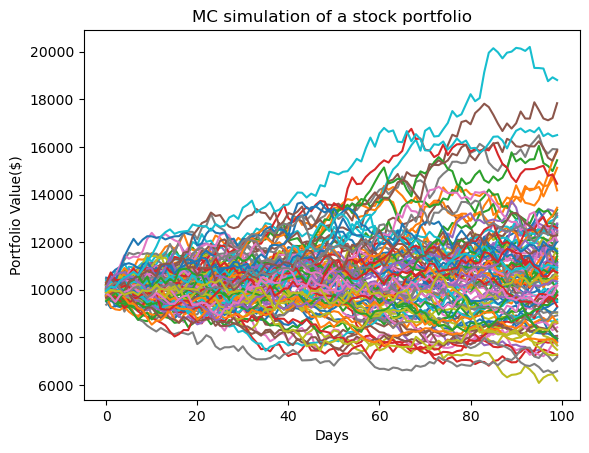

In [33]:
plt.plot(portfolio_sims)
plt.ylabel('Portfolio Value($)')
plt.xlabel('Days')
plt.title('MC simulation of a stock portfolio')
plt.show()

We can see the resulting graph of simulated variables of correlated assets between them that is defined in the covariance matrix given the time period that is also defined and paramterized over. 

This loop is part of a Monte Carlo simulation to model the evolution of a portfolio's value over time based on:
- Randomized daily returns (from a normal distribution),
- The covariance structure of the assets (introduced using Cholesky decomposition),
- Mean daily returns,
- Portfolio weights.

By running the loop for mc_sims iterations, you generate multiple simulated paths for the portfolio's future value, allowing you to estimate potential outcomes and risks.

The graph above visualizes many different potential future paths for the portfolio's value. Each line represents one possible outcome for the portfolio, based on the Monte Carlo simulation.